In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
np.random.seed(1337)
import torch
torch.manual_seed(1337)
plt.style.use('seaborn-v0_8-notebook')  # Example: Applying the 'ggplot' style

from PIL import Image, ImageEnhance
import pytesseract
from torchmetrics.text import CharErrorRate, WordErrorRate


brightnesses = [1., 2., 2.5, 2.75, 3.]
contrasts = [1., 2., 2.5, 3., 4., 5.]

original_image = Image.open('./test/sample.jpg').convert('L')
target = open('./test/sample.gt.txt', 'r').readlines()

records = []
for brightness, contrast in itertools.product(brightnesses, contrasts):
    image = original_image.copy()
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness)  # Increase brightness
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)  # Increase contrast
    
    text = pytesseract.image_to_string(image, lang='hye')
    preds =  [text.split('\n')[0]]
    
    cer = CharErrorRate()
    wer = WordErrorRate()
    records.append({
        'brightness': brightness,
        'contrast': contrast,
        'character accuracy': 1 - cer(preds, target).item(),
        'word accuracy': 1 - wer(preds, target).item(),
    })
df = pd.DataFrame.from_records(records)

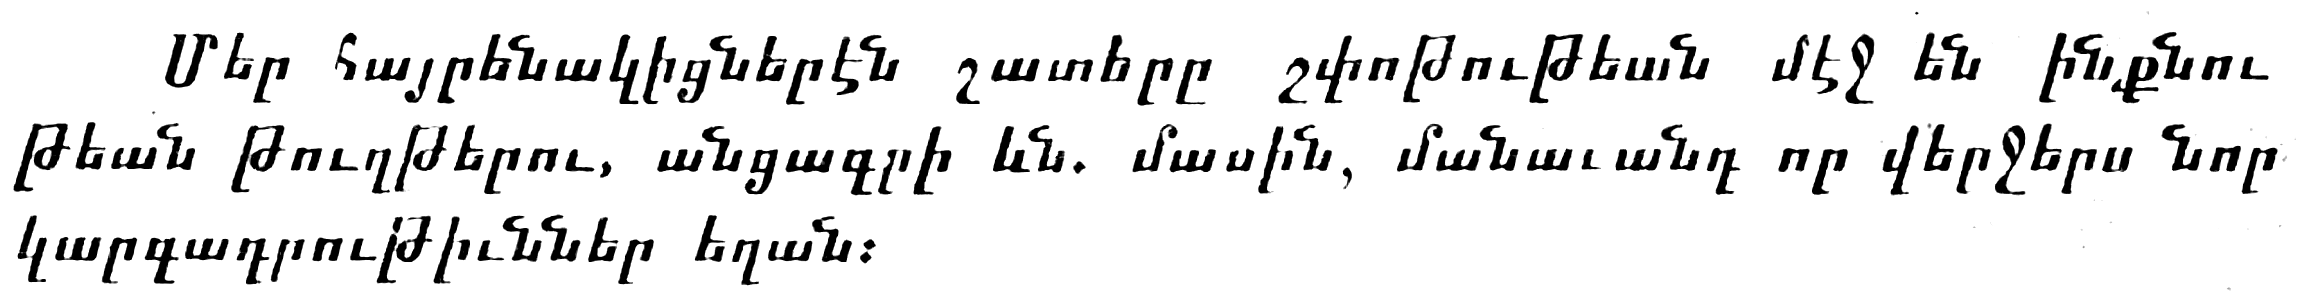

In [3]:
b, c = 2.5, 3 # optimum
image = Image.open('./test/sample.jpg').convert('L')
records = []
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(b)  # Increase brightness
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(c)  # Increase co
display(image)
image.save('./test/sample_denoised.png')

<Axes: title={'center': 'Character accuracy (%)'}, xlabel='brightness'>

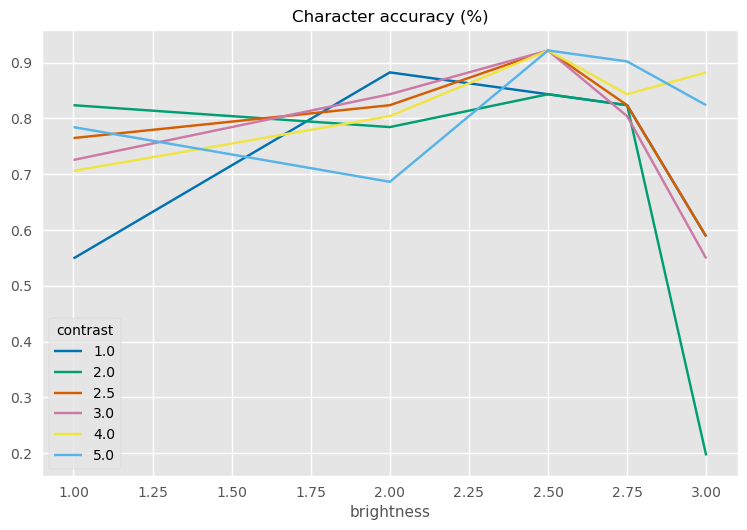

In [34]:
#df.pivot_table(index='contrast', columns='brightness', values='character accuracy').plot()
df.pivot_table(index='brightness', columns='contrast', values='character accuracy').plot(title='Character accuracy (%)')

<Axes: title={'center': 'Character frequency'}, ylabel='character'>

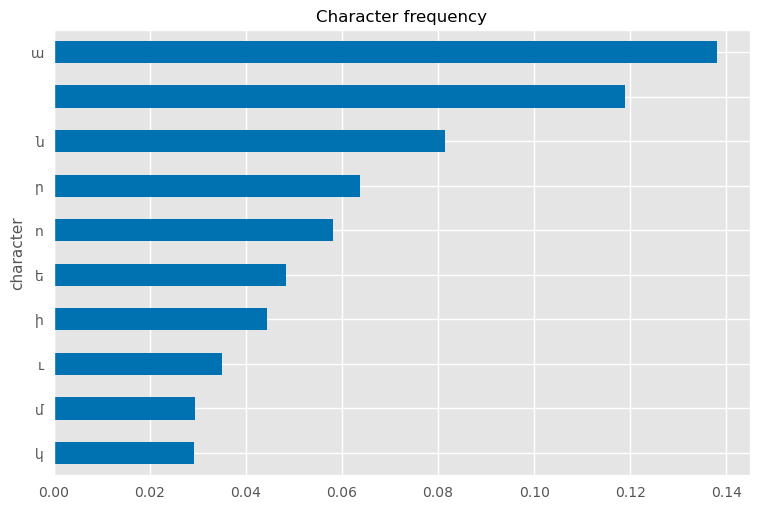

In [35]:
import pandas as pd

hy = open('./test/hy.txt', 'r').read().replace('\n', '')
chs = sorted(list(set(hy)))
freqs = [{'character': ch, 'count': len([x for x in hy if x == ch])} for ch in chs]
df = pd.DataFrame.from_records(freqs).set_index('character')
df['freq'] = df['count'] / df['count'].sum()
df['freq'].nlargest(10).sort_values(ascending=True).plot.barh(title='Character frequency')

In [26]:
# List of unicoede characters
print(''.join([chr(c) for c in range(0x0531, 0x0587 + 1)]))

ԱԲԳԴԵԶԷԸԹԺԻԼԽԾԿՀՁՂՃՄՅՆՇՈՉՊՋՌՍՎՏՐՑՒՓՔՕՖ՗՘ՙ՚՛՜՝՞՟ՠաբգդեզէըթժիլխծկհձղճմյնշոչպջռսվտրցւփքօֆև
